### 决策树回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
x.shape, y.shape

((506, 13), (506,))

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=233)

In [3]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [7]:
reg.score(x_test, y_test)

0.7007709776208266

In [8]:
reg.score(x_train, y_train)

1.0

### 绘制学习曲线

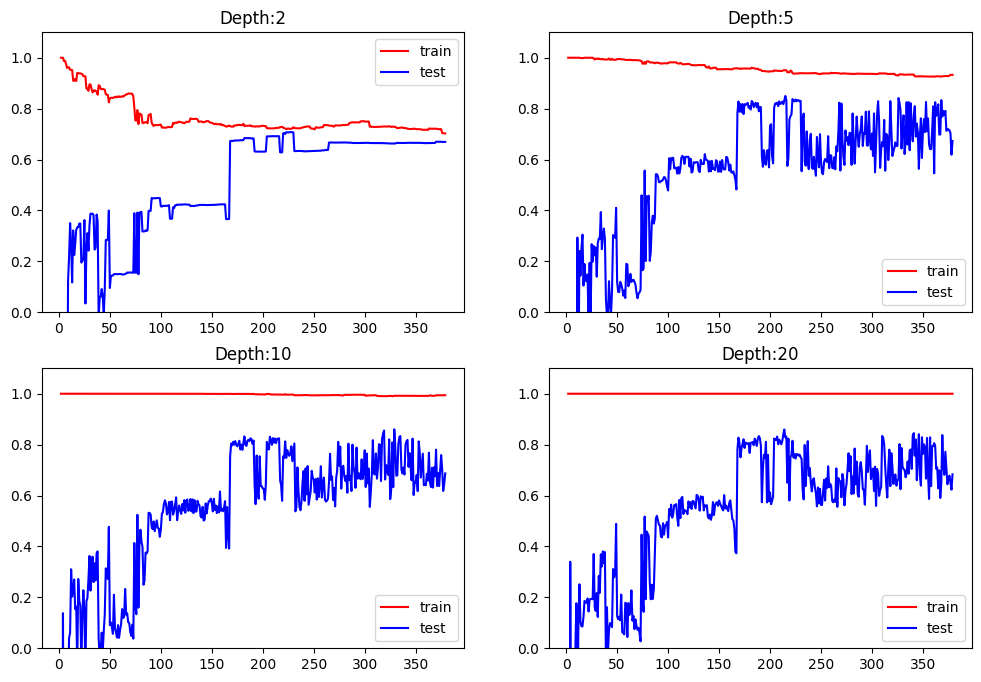

In [20]:
from sklearn.metrics import r2_score
plt.rcParams["figure.figsize"]=(12,8)
max_depth = [2, 5, 10, 20]

for i, depth in enumerate (max_depth) :
    reg = DecisionTreeRegressor(max_depth=depth)
    train_error, test_error = [], []
    for k in range (1, len(x_train)):
        reg.fit(x_train[:k + 1], y_train[:k + 1])
        y_train_pred = reg.predict (x_train[:k + 1])
        train_error.append(r2_score(y_train[:k + 1], y_train_pred))
        y_test_pred = reg.predict(x_test)
        test_error.append(r2_score(y_test, y_test_pred))
    plt.subplot (2,2, i + 1)
    plt.ylim(0,1.1)
    plt.title("Depth:{0}".format (depth))
    plt.plot([k + 1 for k in range(1, len(x_train))], train_error, color = "red", label ='train')
    plt.plot([k + 1 for k in range(1, len(x_train))], test_error, color = "blue", label ='test')
    plt.legend()

### 网格搜索

In [22]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':[n for n in range(2,20)],
    'min_samples_leaf':[sn for sn in range(3,20)]
}
grid = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid = params,
    n_jobs = -1
)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13, 14, 15, 16, 17, 18, 19]})

In [23]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 3}

In [24]:
grid.best_score_

0.7251202465800943

In [25]:
reg = grid.best_estimator_

In [26]:
reg.score(x_test, y_test)

0.7867563472177268